<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Transit_Data_Calgary_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cracking Transit Data — Calgary 2025
## How to Decode and Leverage GTFS for Real-Time Transit Insights

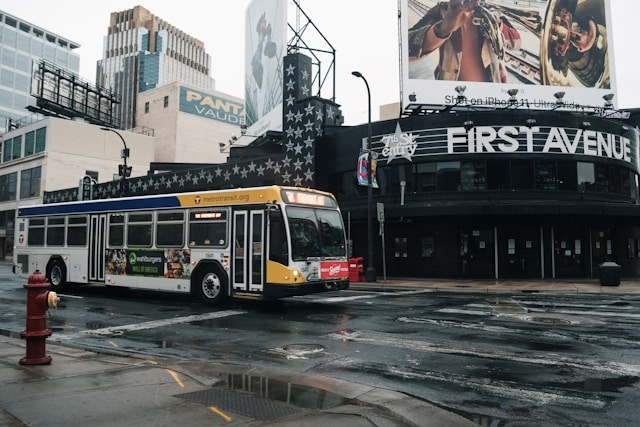



      

# Introduction
In the digital age, public transportation systems increasingly leverage technology to provide passengers with real-time data, enabling a more seamless travel experience. Transit systems share this data primarily through the General Transit Feed Specification (GTFS), a standard that provides data on schedules, routes, and real-time updates. However, while this data can be incredibly valuable, accessing and interpreting it can be challenging, especially when combining static and real-time feeds.

This article shows you how to use Calgary Transit’s data about bus locations and routes to get useful information. If you work with data, understanding these datasets can help improve transit planning and make it better for users. We’ll cover the essential steps for fetching and processing Calgary Transit’s static and real-time data, including troubleshooting common issues you might encounter. By the end of this guide, you’ll be well-equipped to tap into Calgary’s transit data to solve real-world problems.

---

# GTFS
The General Transit Feed Specification (GTFS) is an open standard that formats public transport schedules and geographic data. GTFS allows public transit agencies to publish their data in a format that various software applications can consume, such as trip planners and API developers. This allows users easy access to travel information on smartphones and other devices.

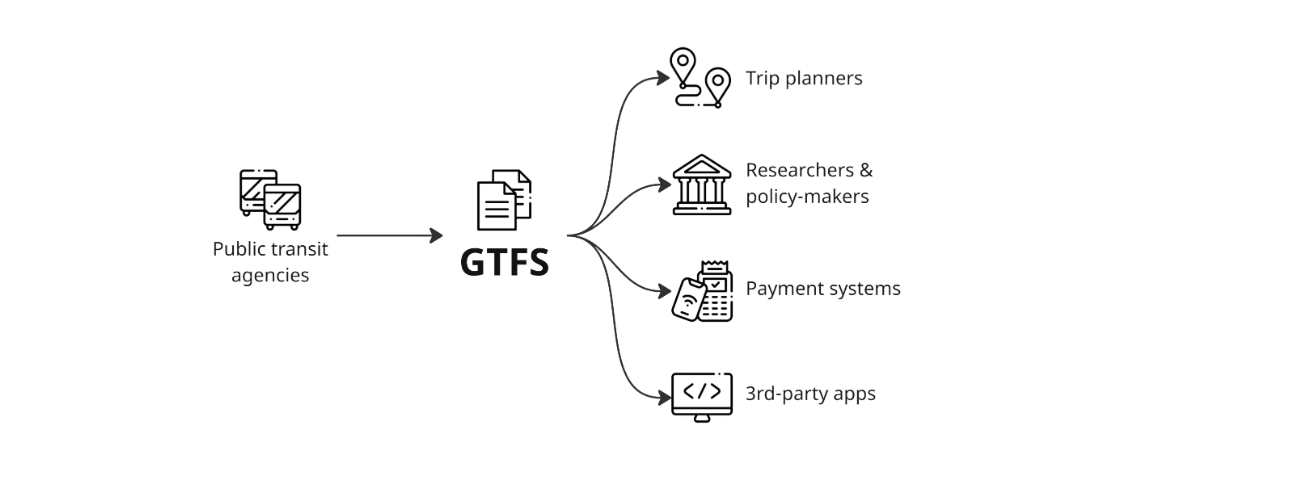

GTFS includes information such as

* Trip Name
* Stops
* Bus Routes
* Fares
* Time and more.

When working with GTFS data, it’s important to understand the source and format of the data you are using. To fully explore and use the transit’s GTFS feeds, including the static and real-time data, visit their official website.

[What is GTFS - General Transit Feed Specification](https://gtfs.org/getting-started/what-is-GTFS/?source=post_page-----49baea30833e--------------------------------)

---

# Data Portal
We can use Calgary’s Open Data Portal to get real-time transit vehicle locations. Calgary Transit provides real-time data through the General Transit Feed Specification Realtime (GTFS-RT) format. These feeds offer live information on vehicle positions, trip updates, and service alerts.

## Available GTFS-RT Feeds
* Vehicle Positions: Provides real-time locations of transit vehicles.
* Trip Updates: Offers real-time updates on scheduled trips, including delays and cancellations.
* Service Alerts: Contains information on disruptions or changes in service.

## Accessing the Feeds
These feeds are accessible via Calgary’s Open Data Portal:

* Vehicle Positions Feed — [Calgary Open Data](https://data.calgary.ca/Transportation-Transit/Calgary-Transit-Realtime-Vehicle-Positions-GTFS-RT/am7c-qe3u?utm_source=chatgpt.com)
* Trip Updates Feed — [Calgary Open Data](https://data.calgary.ca/Transportation-Transit/Calgary-Transit-Realtime-Trip-Updates-GTFS-RT/gs4m-mdc2?utm_source=chatgpt.com)
* Service Alerts — [Calgary Open Data](https://data.calgary.ca/Transportation-Transit/Calgary-Transit-Realtime-Service-Alerts-GTFS-RT/jhgn-ynqj)

---

# Vehicle Positions Feed
## Handling GTFS-RT Feeds with Python
Install Required Libraries

In [1]:
pip install requests protobuf

The requests library is used to send HTTP requests in Python. Whereas the protobuf is a library for working with Protocol Buffers (Protobuf), a method developed by Google for serializing structured data. Long story short, if you are handling GTFS-RT feed, then requests is used to fetch and protobuf is used to parse the data from an API.

## Generating Python code from a Protocol Buffer
We need to use the Protocol buffer compiler protoc1, a tool provided by Google for working with .proto files. We shall use the gtfs-realtime.proto Protobuf definition file. It describes the structure of GTFS-RT messages, including FeedMessage, FeedHeader, FeedEntity, etc. The technical documentation follows below.

[Protobuf - General Transit Feed Specification](https://gtfs.org/documentation/realtime/proto/?source=post_page-----49baea30833e--------------------------------)

In [ ]:
!protoc --python_out=. gtfs-realtime.proto

Running this command creates a Python module, which isgtfs_realtime_pb2.py. If you don’t want the hassle, you can skip this step by just manually uploading the gtfs_realtime_pb2.py to your drive. Click [here](https://github.com/MobilityData/gtfs-realtime-bindings/blob/master/python/google/transit/gtfs_realtime_pb2.py) to access the file. To upload a file on Google Colab, you can write as:

In [3]:
from google.colab import files
files.upload()

Saving gtfs_realtime_pb2.py to gtfs_realtime_pb2.py


{'gtfs_realtime_pb2.py': b'#! /usr/bin/python\n#\n# Copyright 2016-2019 Google Inc., MobilityData\n#\n# Licensed under the Apache License, Version 2.0 (the "License");\n# you may not use this file except in compliance with the License.\n#  You may obtain a copy of the License at\n#\n#     http://www.apache.org/licenses/LICENSE-2.0\n#\n# Unless required by applicable law or agreed to in writing, software\n# distributed under the License is distributed on an "AS IS" BASIS,\n# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.\n# See the License for the specific language governing permissions and\n# limitations under the License.\n\n# -*- coding: utf-8 -*-\n# Generated by the protocol buffer compiler.  DO NOT EDIT!\n# source: gtfs-realtime.proto\n"""Generated protocol buffer code."""\nfrom google.protobuf.internal import builder as _builder\nfrom google.protobuf import descriptor as _descriptor\nfrom google.protobuf import descriptor_pool as _descriptor_pool\nfrom go

Your directory should look something like this. Use the !ls command.



In [4]:
!ls

drive  gtfs_realtime_pb2.py  sample_data


The whole point of using gtfs_realtime_pb2.py is to provide Python classes and methods that make it easy to work with GTFS-RT Protobuf (Protocol Buffers) encoded data. Without it, manual parsing and interpretation of the binary data would be necessary, which is both error-prone and impractical.

## Fetch Calgary Transit’s GTFS-RT Feed
Now let’s fetch and parse the data from the feed. Try uploading the gtfs_realtime_pb2.pymanually because if there is a mismatch between versions of the .proto file, then that will lead to a TypeError.

In [6]:
# Import the requests library to handle HTTP requests
import requests
import pandas as pd
import gtfs_realtime_pb2

def fetch_gtfs_rt_feed(url):
    """
    Fetches GTFS real-time data from the given URL.
    Args:
        url (str): The URL to fetch the GTFS real-time data from.
    Returns:
        feed: A GTFS-RT FeedMessage object containing the parsed data, or None if an error occurs.
    """
    try:
        # Send a GET request to the provided URL
        response = requests.get(url)

        # Check if the response status code is 200 (OK)
        if response.status_code == 200:
            # Initialize a FeedMessage object from gtfs_realtime_pb2
            feed = gtfs_realtime_pb2.FeedMessage()

            # Parse the response content into the FeedMessage object
            feed.ParseFromString(response.content)
            return feed
        else:
            # Print an error message if the status code is not 200
            print(f"Error fetching data: {response.status_code} - {response.reason}")
            return None
    except Exception as e:
        # Print an error message if an exception occurs
        print(f"An error occurred: {e}")
        return None
# URL for GTFS real-time vehicle positions data
vehicle_positions_url = "https://data.calgary.ca/download/am7c-qe3u/application%2Foctet-stream"
# Fetch the GTFS real-time data from the specified URL
feed = fetch_gtfs_rt_feed(vehicle_positions_url)
# Check if the feed was fetched successfully
if feed:
    vehicle_data = []  # Initialize an empty list to store vehicle information

    # Loop through the first 5 entities in the feed
    for entity in feed.entity[:5]:  # [:5] ensures we only process the first 5 entities
        if entity.HasField('vehicle'):  # Check if the entity contains vehicle data
            vehicle = entity.vehicle  # Extract the vehicle field

            # Create a dictionary with relevant vehicle information
            vehicle_info = {
                "Vehicle ID": vehicle.vehicle.id,  # Vehicle identifier
                "Latitude": vehicle.position.latitude,  # Latitude position of the vehicle
                "Longitude": vehicle.position.longitude  # Longitude position of the vehicle
            }

            # Append the vehicle information dictionary to the list
            vehicle_data.append(vehicle_info)

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(vehicle_data)

    # Print the DataFrame to display the data in a tabular format
    print(df)

  Vehicle ID   Latitude   Longitude
0       8241  51.071911 -113.981918
1       1200  51.057251 -114.020523
2       8312  51.121761 -114.071648
3       8274  51.123436 -114.071243
4       8254  51.092236 -114.033279


## Explanation
First, you are using the requests library to fetch the data from the URL. Second, you execute the function fetch_gtfs_rt_feed that retrieves and parses the GTFS real-time feed. Third, you check the response to ensure successful data retrieval. Fourth, the system implements error handling to catch and print any errors. Finally, we then process the feed, which extracts and prints vehicle information like ID and position if available. To neaten the results, I used the Pandas library to display the data.

## Output

In [7]:
df

,Vehicle ID,Latitude,Longitude
0,8241,51.071911,-113.981918
1,1200,51.057251,-114.020523
2,8312,51.121761,-114.071648
3,8274,51.123436,-114.071243
4,8254,51.092236,-114.033279


The data that you are seeing is raw real-time information that comprises vehicle ID and its position (Latitude and Longitude). In some cases, the vehicle ID might directly relate to the Bus number (For example Vehicle ID 1280 will be Bus 128). It all depends on the City’s style of encoding the data. Contact the City Commission to get more accurate results.

## Mapping the Location
Let’s use folium library to map the data. Folium easily visualizes data manipulated in Python. Visit the documentation below.

[Folium Documentation](https://python-visualization.github.io/folium/latest/?source=post_page-----49baea30833e--------------------------------)

You need to install the folium library



In [8]:
!pip install folium

Folium is used to create interactive maps. The reason I am using it is that it’s simple and easy to understand. Let me know if you come across any other similar libraries that get the job done.



In [10]:
import folium  # Importing the folium library to work with interactive maps

def plot_vehicle_on_map(latitude, longitude, vehicle_id):
    """
    Plots the vehicle's location on a map using its latitude, longitude, and ID.

    Parameters:
    latitude (float): The latitude of the vehicle's location.
    longitude (float): The longitude of the vehicle's location.
    vehicle_id (str): The unique identifier for the vehicle.

    Returns:
    folium.Map: A Folium map centered on the vehicle's location with a marker.
    """
    # Create a map centered at the vehicle's location with a zoom level of 14
    vehicle_map = folium.Map(location=[latitude, longitude], zoom_start=14)

    # Add a marker to the map at the vehicle's location
    folium.Marker(
        location=[latitude, longitude],  # The latitude and longitude of the marker
        popup=f"Vehicle ID: {vehicle_id}",  # Popup text to display when the marker is clicked
        icon=folium.Icon(color="blue", icon="bus", prefix="fa"),  # Custom icon for the marker
    ).add_to(vehicle_map)  # Add the marker to the map

    return vehicle_map  # Return the map object
# Example data for a vehicle's location and ID
latitude = 51.071911   # Example latitude value
longitude = -113.981918   # Example longitude value
vehicle_id = "8241"  # Example vehicle ID
# Generate the map with the example vehicle data
map_output = plot_vehicle_on_map(latitude, longitude, vehicle_id)

## Output
Upon execution of the above code, you will get the exact location of the Bus with the ID of 8080. Now keep in mind this data is dynamic. According to the Calgary Data Portal, this data changes every 30 minutes or even sooner.

In [11]:
map_output  # Display the map

# Trip Updates Feed
The GTFS Realtime Trip Updates feed contains information about real-time updates to scheduled trips, such as delays, changes in stop times, and other dynamic data. But in this case, the Calgary real-time feed only provides Trip ID, Start Time, Start Date, Stop ID, Arrival Time, and Departure Time. The feed design reflects trip delays; for example, a trip scheduled for 8:00 AM with a 10-minute delay will show this updated information. The update will also include this ID if bus 8080 is running the trip.

In [12]:
import requests
import gtfs_realtime_pb2  # Import the compiled GTFS Realtime protocol buffer
import pandas as pd
from datetime import datetime

def fetch_gtfs_rt_trip_updates(url):
    """Fetches and parses the GTFS Realtime Trip Updates feed from the given URL."""
    try:
        # Make a GET request to fetch the data from the specified URL
        response = requests.get(url)
        if response.status_code == 200:
            # Parse the response content into a FeedMessage object
            feed = gtfs_realtime_pb2.FeedMessage()
            feed.ParseFromString(response.content)
            return feed
        else:
            # Print an error message if the response status is not OK
            print(f"Error fetching data: {response.status_code} - {response.reason}")
            return None
    except Exception as e:
        # Catch and print any exceptions that occur during the request
        print(f"An error occurred: {e}")
        return None
def extract_trip_updates(feed):
    """Extracts trip update information from the GTFS Realtime feed."""
    trip_updates = []

    # Loop through each entity in the feed
    for entity in feed.entity:
        if entity.HasField('trip_update'):
            # Extract the trip update data
            trip_update = entity.trip_update
            trip_id = trip_update.trip.trip_id
            start_time = trip_update.trip.start_time
            start_date = trip_update.trip.start_date

            # Loop through each stop time update in the trip update
            for stop_time_update in trip_update.stop_time_update:
                stop_id = stop_time_update.stop_id
                # Extract arrival and departure times, if available
                arrival_time = stop_time_update.arrival.time if stop_time_update.HasField('arrival') else None
                departure_time = stop_time_update.departure.time if stop_time_update.HasField('departure') else None

                # Convert timestamps to human-readable format
                arrival_time = datetime.utcfromtimestamp(arrival_time).strftime('%Y-%m-%d %H:%M:%S') if arrival_time else None
                departure_time = datetime.utcfromtimestamp(departure_time).strftime('%Y-%m-%d %H:%M:%S') if departure_time else None

                # Add the extracted information to the trip updates list
                trip_updates.append({
                    "Trip ID": trip_id,
                    "Start Time": start_time,
                    "Start Date": start_date,
                    "Stop ID": stop_id,
                    "Arrival Time": arrival_time,
                    "Departure Time": departure_time
                })
    return trip_updates
# URL for GTFS Realtime Trip Updates
trip_updates_url = "https://data.calgary.ca/download/gs4m-mdc2/application%2Foctet-stream"  # Replace with the actual Trip Updates URL
# Fetch the trip updates feed
feed = fetch_gtfs_rt_trip_updates(trip_updates_url)
if feed:
    # Extract the trip updates from the feed
    trip_updates = extract_trip_updates(feed)

    # Convert the trip updates into a DataFrame for easy manipulation and display
    df_trip_updates = pd.DataFrame(trip_updates)

    # Display the first 10 rows of the DataFrame
    print(df_trip_updates.head(10))

    Trip ID Start Time Start Date Stop ID         Arrival Time  \
0  69082338                          6212  2025-01-17 04:33:00   
1  69082338                          4343  2025-01-17 04:34:00   
2  69082338                          6674  2025-01-17 04:35:00   
3  69082338                          6213  2025-01-17 04:36:00   
4  69082338                          4342  2025-01-17 04:37:00   
5  69082338                          6214  2025-01-17 04:38:00   
6  69082338                          6962  2025-01-17 04:39:00   
7  69082338                          6705  2025-01-17 04:41:00   
8  69082338                          6963  2025-01-17 04:41:00   
9  69082338                          6964  2025-01-17 04:42:00   

        Departure Time  
0  2025-01-17 04:33:00  
1  2025-01-17 04:34:00  
2  2025-01-17 04:35:00  
3  2025-01-17 04:36:00  
4  2025-01-17 04:37:00  
5  2025-01-17 04:38:00  
6  2025-01-17 04:39:00  
7  2025-01-17 04:41:00  
8  2025-01-17 04:41:00  
9  2025-01-17 04:42:00 

## Output

In [15]:
df_trip_updates.head(10)

,Trip ID,Start Time,Start Date,Stop ID,Arrival Time,Departure Time
0,69082338,,,6212,2025-01-17 04:33:00,2025-01-17 04:33:00
1,69082338,,,4343,2025-01-17 04:34:00,2025-01-17 04:34:00
2,69082338,,,6674,2025-01-17 04:35:00,2025-01-17 04:35:00
3,69082338,,,6213,2025-01-17 04:36:00,2025-01-17 04:36:00
4,69082338,,,4342,2025-01-17 04:37:00,2025-01-17 04:37:00
5,69082338,,,6214,2025-01-17 04:38:00,2025-01-17 04:38:00
6,69082338,,,6962,2025-01-17 04:39:00,2025-01-17 04:39:00
7,69082338,,,6705,2025-01-17 04:41:00,2025-01-17 04:41:00
8,69082338,,,6963,2025-01-17 04:41:00,2025-01-17 04:41:00
9,69082338,,,6964,2025-01-17 04:42:00,2025-01-17 04:42:00


If you’re not receiving start_time and start_date from the GTFS Realtime Trip Updates, it might be because those fields are optional and not always provided in the feed. This might be for security reasons as well. Upon contacting the City’s Transit service, you can get this vital information. I hope you understand the point.

[Calgary Transit Realtime Trip Updates GTFS-RT](https://data.calgary.ca/Transportation-Transit/Calgary-Transit-Realtime-Trip-Updates-GTFS-RT/gs4m-mdc2/about_data?utm_source=chatgpt.com&source=post_page-----49baea30833e--------------------------------)

---

## Side Note

You see how there are different IDs involved, such as Trip and the Stop. Now, if all the data is available, you can easily find the corresponding bus that has been running in those routes. Let me know if you can connect those dots. I would be happy to Colab with you and make this a working project.

---

# Service Alerts

Calgary Transit refreshes its real-time data every half minute. To learn more about the [GTFS-RT specification](https://developers.google.com/transit/gtfs-realtime/) and its [components](https://developers.google.com/transit/gtfs-realtime/guides/feed-entities) ([Trip Updates](https://data.calgary.ca/dataset/GTFS-RT-Trip-Updates/gs4m-mdc2), [Service Alerts](https://data.calgary.ca/Transportation-Transit/Calgary-Transit-Realtime-Service-Alerts-GTFS-RT/jhgn-ynqj/about_data), and [Vehicle Positions](https://data.calgary.ca/dataset/GTFS-RT-Vehicle-Positions/am7c-qe3u)), check out the Google Transit API page. Also, see [Service Updates](http://www.calgarytransit.com/service-updates?nid=170214). Let’s see what the service alerts look like.

In [17]:
import requests  # Library to make HTTP requests
import gtfs_realtime_pb2  # Ensure this proto file is compiled as Python
import pandas as pd  # For handling and displaying data in DataFrame format

# Function to fetch the GTFS Realtime Alerts feed
def fetch_gtfs_rt_alerts(url):
    """Fetches and parses the GTFS Realtime Alerts feed from the given URL."""
    try:
        # Send a request to the URL to get the feed
        response = requests.get(url)

        # Check if the response is successful (status code 200)
        if response.status_code == 200:
            # Parse the feed using GTFS Realtime protocol
            feed = gtfs_realtime_pb2.FeedMessage()
            feed.ParseFromString(response.content)
            return feed  # Return the parsed feed
        else:
            # Print error if the response status is not 200
            print(f"Error fetching data: {response.status_code} - {response.reason}")
            return None
    except Exception as e:
        # Catch and print any exception that occurs during the request
        print(f"An error occurred: {e}")
        return None

# Function to extract alerts from the GTFS Realtime feed
def extract_alerts(feed):
    """Extracts alert information from the GTFS Realtime feed."""
    alerts = []  # Initialize an empty list to store alert information

    # Loop through each entity in the feed
    for entity in feed.entity:
        # Check if the entity contains an alert
        if entity.HasField('alert'):
            alert = entity.alert
            # Extract relevant fields from the alert
            alert_id = entity.id  # Unique ID for the alert
            # Extract header text from the alert (if available)
            header_text = alert.header_text.translation[0].text if alert.header_text.translation else "No header"
            # Extract description text from the alert (if available)
            description_text = alert.description_text.translation[0].text if alert.description_text.translation else "No description"
            severity_level = alert.severity_level  # Severity level of the alert (e.g., low, medium, high)

            # Append the extracted alert information to the alerts list
            alerts.append({
                "Alert ID": alert_id,
                "Header": header_text,
                "Description": description_text,
                "Severity Level": severity_level
            })

    # Return the list of alerts
    return alerts

# URL for GTFS Realtime Alerts (replace with the actual URL)
alerts_url = "https://data.calgary.ca/download/jhgn-ynqj/application%2Foctet-stream"  # Example placeholder URL

# Fetch the alerts feed
feed = fetch_gtfs_rt_alerts(alerts_url)

# If feed is fetched successfully, extract the alerts
if feed:
    alerts = extract_alerts(feed)

    # Convert the list of alerts into a DataFrame for easier viewing
    df_alerts = pd.DataFrame(alerts)

    # Display the first 5 rows of the alerts DataFrame
    print(df_alerts.head(5))

  Alert ID Header                                        Description  \
0   166173         <div data-effect="DETOUR"></div>\n<p>Starting ...   
1   166174         <div data-effect="DETOUR"></div><p>Starting Th...   
2   166175         <div data-effect="STOP_MOVED"></div>\n<p>Start...   
3   166177         <div data-effect="DETOUR"></div>\n<p>Starting ...   
4   166178         <div data-effect="DETOUR"></div>\n<p>Starting ...   

   Severity Level  
0               1  
1               1  
2               1  
3               1  
4               1  


You can read the documentation of the Service Alerts below.

[Calgary Transit Realtime Service Alerts GTFS - RT](https://data.calgary.ca/Transportation-Transit/Calgary-Transit-Realtime-Service-Alerts-GTFS-RT/jhgn-ynqj/about_data?source=post_page-----49baea30833e--------------------------------)

Upon executing the above code snippet, I noticed that the data was not in the readable format. The descriptions were not fully displayed and contained HTML tags. So that’s why I have used BeautifulSoup library to clean this up, you can trim leading and trailing spaces or newlines from the alert text.



In [18]:
from bs4 import BeautifulSoup  # Import the BeautifulSoup library to parse and clean HTML

def clean_html(raw_html):
    """Removes HTML tags and returns plain text."""
    # Create a BeautifulSoup object to parse the HTML content
    soup = BeautifulSoup(raw_html, 'html.parser')
    # Use the get_text() method to extract and return the plain text from the HTML
    return soup.get_text()
# Loop through each alert and clean the "Header" and "Description" fields by removing HTML tags
for alert in alerts:
    # Apply the clean_html function to the "Header" field
    alert["Header"] = clean_html(alert["Header"])
    # Apply the clean_html function to the "Description" field
    alert["Description"] = clean_html(alert["Description"])
# Convert the cleaned alerts into a pandas DataFrame for easy viewing and manipulation
df_alerts = pd.DataFrame(alerts)
# Display the first 5 rows of the DataFrame to verify the cleaned alerts
print(df_alerts.head(5))


  Alert ID Header                                        Description  \
0   166173         \nStarting Thursday, January 16 at 9 a.m. thro...   
1   166174         Starting Thursday, January 16 at 9 a.m. throug...   
2   166175         \nStarting Thursday, January 16 at 9 a.m. thro...   
3   166177         \nStarting Thursday, January 16 at 9 a.m. thro...   
4   166178         \nStarting Thursday, January 16 at 9 a.m. thro...   

   Severity Level  
0               1  
1               1  
2               1  
3               1  
4               1  


# Output
You might be asking yourself, “Can I associate this with the trip_id and vehicle_id”. The answer is Yes, by incorporating that information into your data processing, you can link the alerts to particular trip_id and vehicle_id. Every alert should be connected to the appropriate trip and vehicle. Once again, it’s a moving piece of the puzzle. Once the data is completely available for the public without encapsulation, this can be possible.

In [19]:
df_alerts.head(5)

,Alert ID,Header,Description,Severity Level
0,166173,,"\nStarting Thursday, January 16 at 9 a.m. thro...",1
1,166174,,"Starting Thursday, January 16 at 9 a.m. throug...",1
2,166175,,"\nStarting Thursday, January 16 at 9 a.m. thro...",1
3,166177,,"\nStarting Thursday, January 16 at 9 a.m. thro...",1
4,166178,,"\nStarting Thursday, January 16 at 9 a.m. thro...",1


# Conclusion
You’ve made it to the end! This topic is vast and offers significant opportunities for further exploration and development. With the right approach, you could create a new application to help Calgary’s residents avoid inconveniences during bus travel, especially in extreme weather conditions. If you encounter any issues while executing the code, feel free to reach out. Suggestions are always welcome! I hope you enjoyed reading this article, and I look forward to seeing you next time. Happy coding!